<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/machine_learning/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qandli diabetni aniqlash

## Faoliyatni o\`rganish

**Loyiha maqsadi**, Hindistonning qandli diabet va buyrak kasalliklari milliy institutidan olingan ma\`lumotlar to\`plamidagi diagnostik o’lchovlar asosida bemorda diabet bor yoki yo’qligini taxmin qiluvchi model yaratishdan iborat.<br>
Model yaratish uchun diagnostik ko\`rsatkichlarning kasal yoki sog\`lom odamga tegishli ekanligini bilish zarur. Shuningdek model kasal yoki sog\`lom natijalardan birini chiqarishi kerak. Demak supervised learning klassifikatsiya algoritmidan foydalanamiz. 

## Ma\`lumotlarni o\`rganish

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
sns.set_style('darkgrid')

Ma\`lumotlar to\`plamini `opendatasets` yordamida yuklab olamiz

In [45]:
! pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download('https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database')

100%|██████████| 8.91k/8.91k [00:00<00:00, 5.97MB/s]

In [ ]:
import os
os.listdir('pima-indians-diabetes-database')

['diabetes.csv']

In [ ]:
diabetes_df = pd.read_csv('./pima-indians-diabetes-database/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Ustunlar**:
* `Pregnancies` - Homilador bo\`lganlik soni
* `Glucose` - Glyukozaga test natijasi
* `BloodPressure` - Diastolik qon bosimi (mm Hg)
* `Skin Thickness` - [Triceps teri burmasining qalinligi (mm)](https://medical-dictionary.thefreedictionary.com/triceps+skin-fold+thickness)
* `Insulin` - 2 soatlik sarum insulini (mu U/ml)
* `BMI` - Tana massasi indeksi (vazn kg/(bo\`yi metrda)^2)
* `DiabetesPedigreeFunction` - Diabetning naslchilik funktsiyasi
* `Age` - Yoshi (yillarda)
* `Outcome` - Class (0 – diabet yo’q, 1 – diabet)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`null` qiymatlar mavjud emas va barcha ustunlar sonli turda. Endi ma\`lumotlar haqida asosiy statistik ma\`lumotlarni `describe` metodi yordamida olamiz

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Ba\`zi bir ustunlarda 0 qiymatlar mavjud ekan, lekin ulardan quyidagilarida bunday bo\`lishi mumkin emas:
* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`

#### 0 qiymatlarni ularni boshqa qiymatlar bilan almashtirishda qulaylik bo\`lishi uchun `nan` qiymatlar bilan almashtiramiz

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_spec = diabetes_df[cols].copy(deep=True)
diabetes_spec = diabetes_spec.replace(0, np.NaN)

Chetki nuqtalarni aniqlaymiz

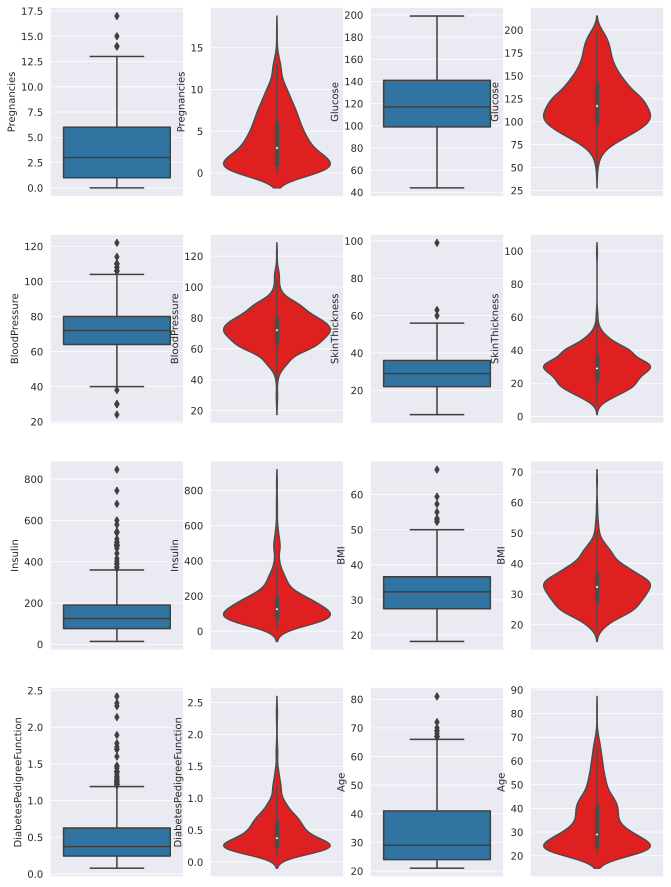

In [ ]:
df_copy = diabetes_df.copy(deep=True)
df_copy[cols] = diabetes_spec[cols].copy(deep=True)
fig, ax = plt.subplots(4, 4, figsize=(11, 16))
inds = [[(0,0),(0,1)],[(0,2),(0,3)],[(1,0),(1,1)],[(1,2),(1,3)],[(2,0),(2,1)],[(2,2),(2,3)],[(3,0),(3,1)],[(3,2),(3,3)]]
for col, ind in zip(df_copy.columns[:-1],inds):
    sns.boxplot(ax=ax[ind[0]], data=df_copy, y=col)
    sns.violinplot(ax=ax[ind[1]], data=df_copy, y=col, color='r')
plt.show()

Har bir ustunda chetki qiymatlar bor, lekin `SkinThickness` ustunidagi bir qiymat boshqalaridan sezilarli farq qiladi, shuning uchun ham uni olib tashlaymiz.

In [ ]:
diabetes_spec.drop(diabetes_spec['SkinThickness'].idxmax(), inplace=True)
diabetes_df.drop(df_copy['SkinThickness'].idxmax(), inplace=True)

In [ ]:
diabetes_spec.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          373
BMI               11
dtype: int64

`SkinThickness` va `Insulin` ustunlarida ma\`lumotlarning katta qismi yo\`q ekan. Endi har bir ustundagi `nan` qiymatlarni taqsimotiga ko\`ra qiymatlar bilan to\`ldiramiz

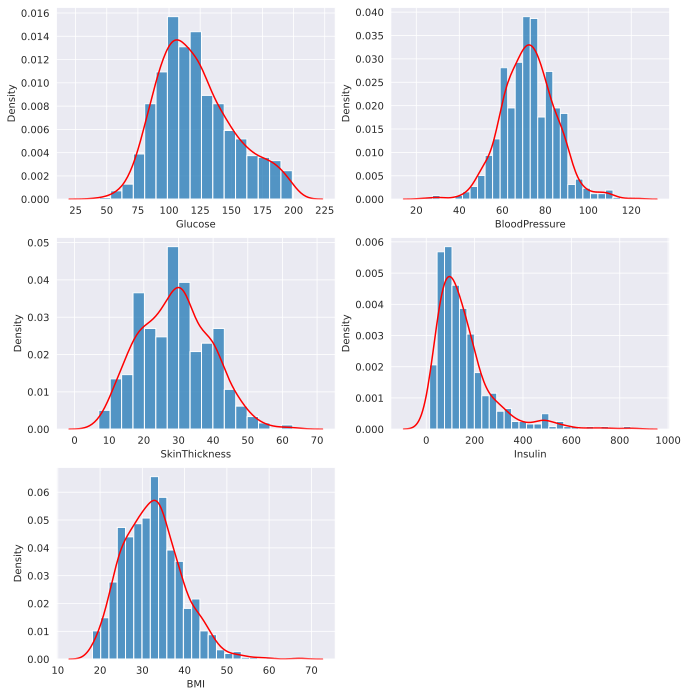

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(11, 12))
inds = [(0,0),(0,1),(1,0),(1,1),(2,0)]
for col, ind in zip(cols,inds):
    sns.histplot(ax=ax[ind], data=diabetes_spec, x=col, stat='density')
    sns.kdeplot(ax=ax[ind], data=diabetes_spec, x=col, color='r')
ax[2,1].axis('off')
plt.show()

Normal taqsimotdagi to\`plamda `nan` qiymatlarni to\`ldirishning eng yaxshi usullaridan biri bu o\`rtacha qiymatdan foydalanish. `Glucose` va `BloodPressure` ustunlaridagi ma\`lumotlar normal taqsimotga yaqin taqsimlangan. Ushbu ustunlardagi `nan` qiymatlarni o\`rtacha qiymat bilan to\`ldiramiz. `SkinThickness` va `Insulin`ustunlarida ma\`lumotlarning katta qismi mavjud emas va `Insulin` ustunida ma\`lumotlar `BMI` ustunidagi kabi bir tomonga og\`ib ketgan, shuning uchun ham ushbu ustunlardagi `nan` qiymatlarni median qiymat yordamida to\`ldiramiz.

In [ ]:
diabetes_spec['Glucose'].fillna(diabetes_spec['Glucose'].mean(), inplace=True)
diabetes_spec['BloodPressure'].fillna(diabetes_spec['BloodPressure'].mean(), inplace=True)
diabetes_spec['SkinThickness'].fillna(diabetes_spec['SkinThickness'].median(), inplace=True)
diabetes_spec['Insulin'].fillna(diabetes_spec['Insulin'].median(), inplace=True)
diabetes_spec['BMI'].fillna(diabetes_spec['BMI'].median(), inplace=True)

In [ ]:
diabetes_spec.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,767.000000,767.000000,767.000000,767.000000,767.000000
mean,121.587927,72.408470,29.016949,140.692308,32.452282
std,30.333839,12.103927,8.426210,86.437570,6.879184
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.500000,64.000000,25.000000,121.000000,27.500000
50%,117.000000,72.408470,29.000000,125.000000,32.300000
75%,140.000000,80.000000,32.000000,127.500000,36.600000
max,199.000000,122.000000,63.000000,846.000000,67.100000


Kiritilgan o\`zgarishlarni asil df-ga saqlaymiz

In [ ]:
diabetes_df[cols] = diabetes_spec[cols].copy(deep=True)

## Ma\`lumotlarni tahlil qilish

0    500
1    267
Name: Outcome, dtype: int64


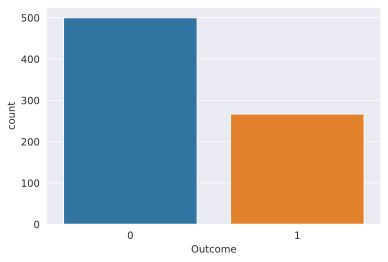

In [ ]:
sns.countplot(data=diabetes_df, x='Outcome')
class_count = diabetes_df['Outcome'].value_counts()
print(class_count)
plt.show()

Ma\`lumotlar to\`plamida diabet bo\`lganlar soni diabet emaslar sonidan deyarli ikki marta ko\`p. Ma\`lumotlarni train va test to\`plamlarga bo\`lishda buni inobatga olish kerak.

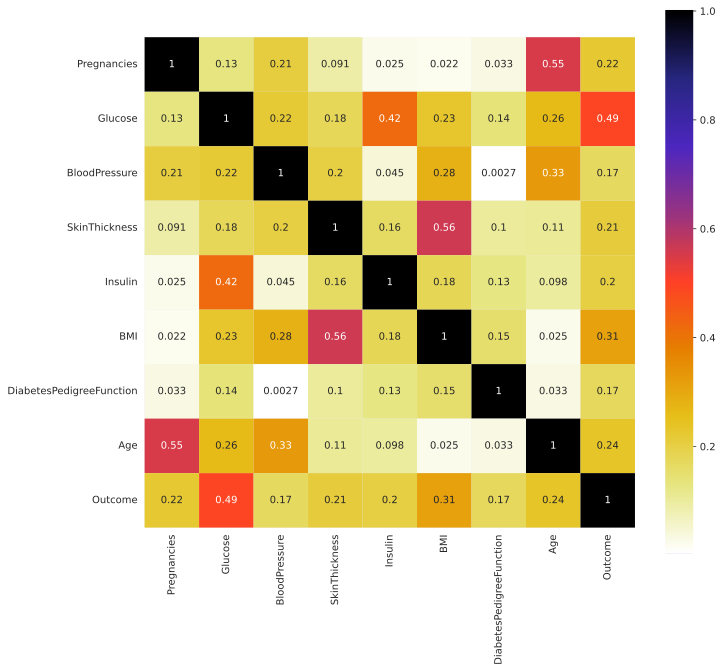

In [ ]:
plt.figure(figsize=(11,10))
corr_matrix = diabetes_df.corr().abs()
sns.heatmap(corr_matrix, square=True, annot=True,  cmap='CMRmap_r')
plt.show()

`Outcome` ustuni qolgan ustunlar bilan kuchli korrelyatsiyaga ega emas ekan

## Modellash

Ma\`lumotlar to\`plamidan labellarni ajratib olib qolgan qismini **standard scaler** yordamida bir xil oraliqqa keltirib olamiz

In [ ]:
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df.Outcome.copy(deep=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X=s_scaler.fit_transform(X)

train va test setga ajratamiz

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Eng yaxshi `k` ni **GridSearch** yordamida aniqlaymiz

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,30)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

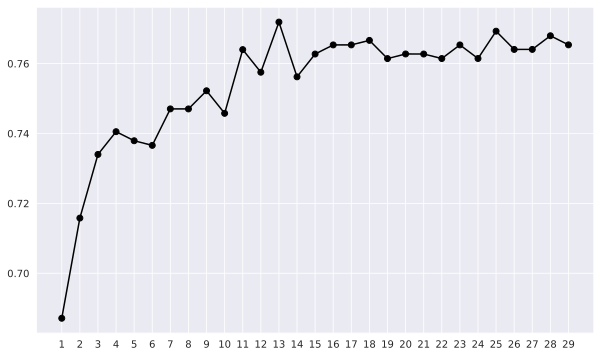

In [ ]:
plt.figure(figsize=(10,6))
pd.DataFrame(knn_gscv.cv_results_)
plt.plot(np.arange(1,30), knn_gscv.cv_results_['mean_test_score'],marker='o', c='k')
plt.xticks(np.arange(1,30))
plt.show()

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 13}

k=13 qiymatdan foydalanamiz

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred = knn.predict(X_test)

## Modelni baholash

In [ ]:
#Jakkard indeksini aniqlaymiz
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.4090909090909091

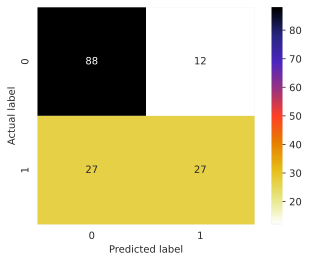

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, square=True, annot=True, cmap='CMRmap_r')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

